In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l_keq1 = np.load("10keq_test.npy")
l_keq2 = np.load("10keq_test2.npy")
l_keq = np.concatenate((l_keq1, l_keq2), axis=0)

In [3]:
# find eigenvalues and eigenvectors of each matrix
eigenvalues = []
eigenvectors = []
for i in range(len(l_keq)):
    eig_val, eig_vec = np.linalg.eig(l_keq[i])
    eigenvalues.append(eig_val)
    eigenvectors.append(eig_vec)

In [4]:
eigenvalues = np.array(eigenvalues)
eigenvectors = np.array(eigenvectors)

In [5]:
idx = np.where(eigenvalues[:, 1] < 0.002)[0]

all_idx = np.arange(len(l_keq))
idx = np.setdiff1d(all_idx, idx)

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]

(array([8., 9., 7., 5., 2., 1., 1., 1., 1., 3.]),
 array([0.00423113, 0.00494363, 0.00565612, 0.00636862, 0.00708112,
        0.00779362, 0.00850611, 0.00921861, 0.00993111, 0.01064361,
        0.01135611]),
 <BarContainer object of 10 artists>)

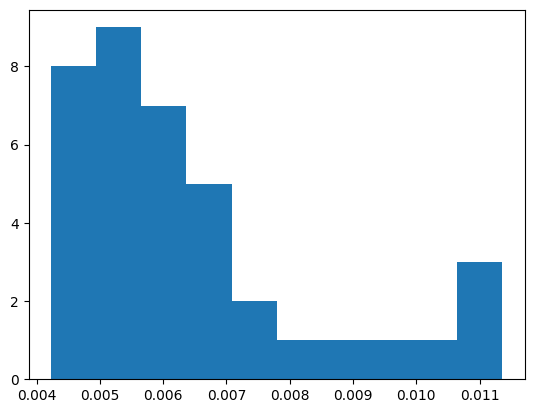

In [6]:
plt.hist(eigenvalues[:, 1])

In [18]:
# change default font size
plt.rcParams.update({'font.size': 14})

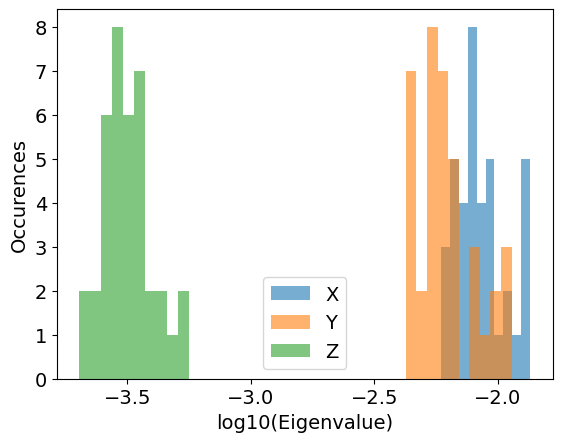

In [20]:
%matplotlib inline
# plot the three eigenvalues as histograms one for each eigenvalue
fig, ax = plt.subplots()
labels = ["X", "Y", "Z"]
for i in range(3):
    ax.hist([np.log10(eigenvalues[j][i]) for j in range(len(eigenvalues))], bins=10, alpha=.6, label=labels[i])

ax.legend()
ax.set_xlabel('log10(Eigenvalue)')
ax.set_ylabel('Occurences')
# ax.set_title('Histogram of Eigenvalues')
plt.savefig('eigenvalues_histogram.png')

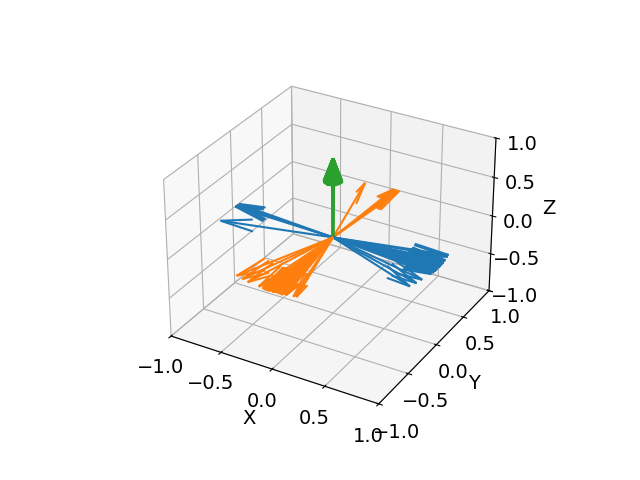

In [22]:
%matplotlib widget
#
# plot eigenvectors as vectors 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ["C0", "C1", "C2"]
for j in range(38):
    for i in range(3):
        ax.quiver(0, 0, 0, eigenvectors[j][i][0], eigenvectors[j][i][1], eigenvectors[j][i][2], label='Eigenvalue {}'.format(i+1), color=colors[i])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# plt.title('Eigenvectors')
plt.savefig("eigenvectors.png")